# **Q1. What is the mathematical formula for a linear SVM?**


**Mathematical formula for a linear SVM**:
   The decision function for a linear Support Vector Machine (SVM) can be represented as:
   
   
    ⨍(x) = W • X + b 
     =  • X + b 
   Where:
   - W is the weight vector.
   - X is the input feature vector.
   - b is the bias term.

# **Q2. What is the objective function of a linear SVM?**


**Objective function of a linear SVM**:
   
   The objective function of a linear SVM aims to maximize the margin between the support vectors and the decision boundary. Mathematically, it can be formulated as:
   

   min w,ʙ ½ ∣∣w∣∣ 2
 
   Subject to the constraint:
   
    Yi(W • X + b ) ≥ 1 
   
   for all training samples (Xi,Yi), where Yi is the class label of sample Xi.


# **Q3. What is the kernel trick in SVM?**


3. **Kernel trick in SVM**:
   The kernel trick allows SVMs to handle nonlinear decision boundaries by implicitly mapping the input features into a higher-dimensional space. Instead of explicitly computing the coordinates of the data points in that space, the kernel function computes the dot products between the images of all pairs of data points in the feature space. This allows the SVM to effectively find nonlinear decision boundaries without actually having to compute the transformation explicitly.


# **Q4. What is the role of support vectors in SVM Explain with example**


4. **Role of support vectors in SVM**:
   Support vectors are the data points that lie closest to the decision boundary (the margin). They play a crucial role in defining the decision boundary because changing their positions would likely change the location of the decision boundary. These points are the most informative ones for determining the optimal hyperplane that separates different classes. Support vectors are critical for generalization as they represent the most challenging instances of the dataset. For example, consider a simple binary classification problem with two classes (red and blue) separated by a line. The support vectors would be the data points closest to the decision boundary, often lying on the margin or misclassified.


# **Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?**


5. **Illustration with examples and graphs**:
   - Hyperplane: In a linear SVM, the hyperplane is the decision boundary that separates the classes. It's a flat affine subspace of dimension \( n-1 \), where \( n \) is the number of features. For example, in a 2D feature space, the hyperplane is a line.
   - Marginal plane: The marginal planes are parallel hyperplanes that run parallel to the decision boundary and are equidistant from it. These planes define the margin, which is the region where the support vectors lie.
   - Soft margin: In a soft-margin SVM, the margin allows for some misclassification of training examples to achieve a better overall fit. It introduces a penalty term for misclassified points, allowing for some flexibility in the decision boundary.
   - Hard margin: In a hard-margin SVM, the margin is maximized without allowing any misclassification of training examples. This approach is more sensitive to outliers and noise in the data and may lead to overfitting if the data is not linearly separable.


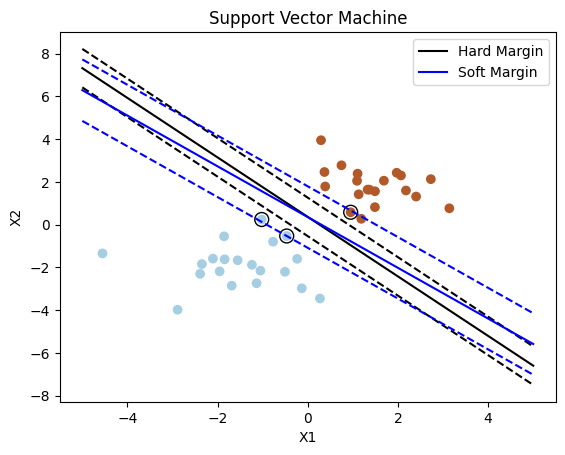

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generating synthetic data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20

# Fit the model
clf_hard = svm.SVC(kernel='linear', C=1000)
clf_hard.fit(X, y)

clf_soft = svm.SVC(kernel='linear', C=0.1)
clf_soft.fit(X, y)

# Get the separating hyperplane
w_hard = clf_hard.coef_[0]
a_hard = -w_hard[0] / w_hard[1]
xx_hard = np.linspace(-5, 5)
yy_hard = a_hard * xx_hard - (clf_hard.intercept_[0]) / w_hard[1]

w_soft = clf_soft.coef_[0]
a_soft = -w_soft[0] / w_soft[1]
xx_soft = np.linspace(-5, 5)
yy_soft = a_soft * xx_soft - (clf_soft.intercept_[0]) / w_soft[1]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the separating hyperplanes and margins
plt.plot(xx_hard, yy_hard, 'k-', label='Hard Margin')
plt.plot(xx_hard, yy_hard + 1 / np.sqrt(np.sum(clf_hard.coef_ ** 2)), 'k--')
plt.plot(xx_hard, yy_hard - 1 / np.sqrt(np.sum(clf_hard.coef_ ** 2)), 'k--')

plt.plot(xx_soft, yy_soft, 'b-', label='Soft Margin')
plt.plot(xx_soft, yy_soft + 1 / np.sqrt(np.sum(clf_soft.coef_ ** 2)), 'b--')
plt.plot(xx_soft, yy_soft - 1 / np.sqrt(np.sum(clf_soft.coef_ ** 2)), 'b--')

plt.scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Support Vector Machine')
plt.show()




   In the graph:
   - The solid line represents the hyperplane.
   - The dotted lines represent the marginal planes.
   - The shaded region between the marginal planes is the margin.
   - The filled circles represent support vectors.
   - The dashed lines represent the soft margin, allowing for misclassification.
   - The dotted lines represent the hard margin, not allowing any misclassification.

#  **Q6. SVM Implementation through Iris dataset.**
- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of
the model.


 **Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.**

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd

# load the dataset

dataset = load_iris()
# split the dataset into depemdemt and indepemdemt feature
x = dataset.data #depedent feature
y =dataset.target #independent feature

#  split the dataset into train and test data
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=42)
X_train.shape,x_test.shape

# train the linear SVM classifier
svc = SVC(kernel='linear')

svc.fit(X_train,y_train)
# prediction 
y_pred = svc.predict(x_test)
y_pred

# finding out the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Hyper parameter tuning tunning with SVC
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = { 
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear']
    }


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


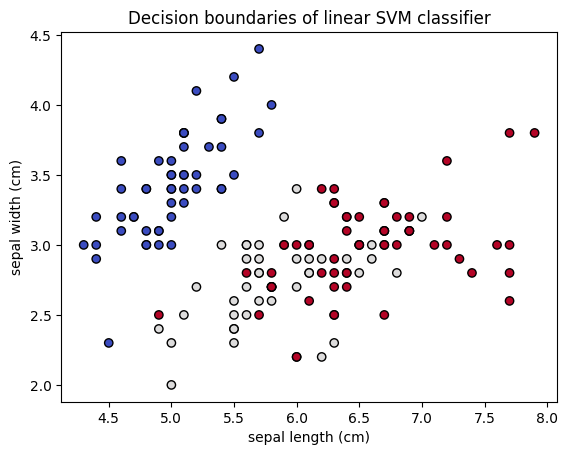

In [23]:
import numpy as np
# selecting two feature for ploting decesion tree boundary's
feature1= 0 # indexs of the features
feature2= 1

X1 = dataset.data[:,[feature1,feature2]]
Y1 = dataset.target

# split the dataset into train and test data
X_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.25,random_state=42)

# Train the linear SVM classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# create a mess grid of points for the visualization
x_min, x_max = X1[:,0].min() - 1, X1[:,0].max() + 1
y_min, y_max = X1[:,0].min() - 1, X1[:,0].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                    np.arange(y_min,y_max,0.02))

#predict the class labels for each points i the mesh grid 
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
                    
# plot the decinsion boundaries

Z = Z.reshape(xx.shape)

# plot the training data points
import matplotlib.pyplot as plt

plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(dataset.feature_names[feature1])
plt.ylabel(dataset.feature_names[feature2])
plt.title('Decision boundaries of linear SVM classifier')
plt.show()